In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
# #         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import os

## Create the Training, Test & Prediction Dataset

In [3]:
# os.listdir('/kaggle/input/intel-image-classification/seg_pred/seg_pred')

In [4]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'
pred_dir = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'

In [5]:
train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                   label_mode='categorical',
                                                   image_size=(150,150),
                                                   batch_size=32)
test = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                   label_mode='categorical',
                                                   image_size=(150,150),
                                                  batch_size=32)
# pred = tf.keras.utils.image_dataset_from_directory(pred_dir,
#                                                    label_mode='categorical',
#                                                    image_size=(150,150),
#                                                   batch_size=32)

Found 14034 files belonging to 6 classes.


2022-01-12 15:44:26.431646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 15:44:26.577619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 15:44:26.578672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 15:44:26.581873: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 3000 files belonging to 6 classes.


## Visualize the data

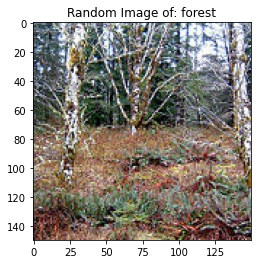

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(dirname):
    class_names = train.class_names
    random_class = random.choice(class_names)
    dirname = train_dir
    random_image_folder = os.path.join(dirname,random_class)
    random_image = random.choice(os.listdir(random_image_folder))
    random_image_path = os.path.join(random_image_folder,random_image)
    image = mpimg.imread(random_image_path)
    plt.imshow(image)
    plt.title(f"Random Image of: {random_class}");
    
view_random_image(train_dir)

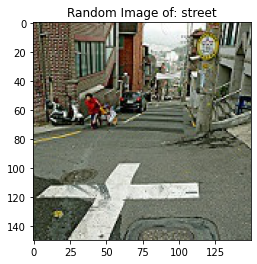

In [7]:
view_random_image(test_dir)

## Baseline model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
nos_class = len(train.class_names)
nos_class

6

In [10]:
model_1 = tf.keras.Sequential([
    layers.Input(shape=(150,150,3)),
    layers.Rescaling(scale=1/255.),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    layers.GlobalMaxPool2D(),
    layers.Dense(nos_class,activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 1,094
Trainable params: 1,094
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# Fit the model
model_1.fit(train,epochs=5,verbose=1,steps_per_epoch=len(train),
           validation_data=test,validation_steps=int(0.2*len(test)))

Epoch 1/5


2022-01-12 15:44:31.291003: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-12 15:44:32.953418: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 [==============================] - 39s 71ms/step - loss: 1.5927 - accuracy: 0.4005 - val_loss: 1.4270 - val_accuracy: 0.4392
Epoch 2/5
439/439 [==============================] - 14s 32ms/step - loss: 1.2631 - accuracy: 0.5362 - val_loss: 1.2519 - val_accuracy: 0.4931
Epoch 3/5
439/439 [==============================] - 14s 32ms/step - loss: 1.1348 - accuracy: 0.5728 - val_loss: 1.1918 - val_accuracy: 0.4965
Epoch 4/5
439/439 [==============================] - 13s 30ms/step - loss: 1.0761 - accuracy: 0.5903 - val_loss: 1.1297 - val_accuracy: 0.5521
Epoch 5/5
439/439 [==============================] - 15s 34ms/step - loss: 1.0417 - accuracy: 0.6015 - val_loss: 1.1086 - val_accuracy: 0.5503


In [12]:
model_1.evaluate(test)

94/94 [==============================] - 6s 59ms/step - loss: 1.0754 - accuracy: 0.5750


[1.0754311084747314, 0.574999988079071]

## View Test Data Prediction

In [13]:
for images,labels in test.take(1):
    print(images.shape)
    print(labels.shape)
    

(32, 150, 150, 3)
(32, 6)


In [14]:
class_names = train.class_names
# random_index = random.choice(range(32))
# random_image = images[random_index]
# true_labels = labels[random_index]
# pred_class = class_names[tf.argmax(model_1.predict(tf.expand_dims(random_image,axis=0))[0]).numpy()]
# plt.imshow(ramdom_image)
 
# # tf.argmax(model_1.predict(tf.expand_dims(images[0],axis=0))[0]).numpy()

## Prediction of pred data

In [15]:
predictions = []
pred_images = os.listdir(pred_dir)

for img in pred_images[:5]:
    image_file = os.path.join(pred_dir,img)
    image = mpimg.imread(image_file)  # Read the image file
    pred_class = class_names[tf.argmax(model_1.predict(tf.expand_dims(image,axis=0))[0]).numpy()]
    predictions.append(pred_class)
#     plt.figure()
#     plt.imshow(image)
#     plt.title(f"Pred Class: {pred_class}")


In [16]:
predictions

['glacier', 'buildings', 'mountain', 'buildings', 'mountain']

## Transfer Learning (Efficientnet)

In [17]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  input_shape=(150,150,3))
base_model.trainable = False
inputs = layers.Input(shape=(150,150,3))
x = base_model(inputs,training=False)
x = layers.GlobalMaxPool2D()(x)
outputs = layers.Dense(nos_class,activation='softmax')(x)
model_TL = tf.keras.Model(inputs,outputs)
model_TL.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 5, 5, 1280)        4049571   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7686      
Total params: 4,057,257
Trainable params: 7,686
Non-trainable params: 4,049,571
_________________________________________________________________


In [18]:
# Compile the model
model_TL.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# Fit the model
model_TL.fit(train,epochs=5,verbose=1,steps_per_epoch=len(train),
           validation_data=test,validation_steps=int(0.2*len(test)))

Epoch 1/5
439/439 [==============================] - 26s 45ms/step - loss: 0.4938 - accuracy: 0.8349 - val_loss: 0.3353 - val_accuracy: 0.8924
Epoch 2/5
439/439 [==============================] - 19s 43ms/step - loss: 0.2849 - accuracy: 0.9040 - val_loss: 0.3510 - val_accuracy: 0.8750
Epoch 3/5
439/439 [==============================] - 19s 43ms/step - loss: 0.2254 - accuracy: 0.9179 - val_loss: 0.3758 - val_accuracy: 0.8924
Epoch 4/5
439/439 [==============================] - 18s 41ms/step - loss: 0.2026 - accuracy: 0.9275 - val_loss: 0.3607 - val_accuracy: 0.8837
Epoch 5/5
439/439 [==============================] - 18s 41ms/step - loss: 0.1895 - accuracy: 0.9297 - val_loss: 0.4260 - val_accuracy: 0.8802


In [19]:
model_TL.evaluate(test)

94/94 [==============================] - 4s 38ms/step - loss: 0.3962 - accuracy: 0.8857


[0.39618489146232605, 0.8856666684150696]

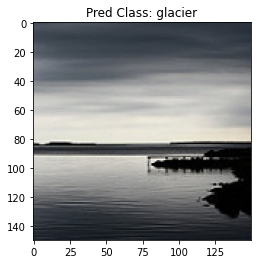

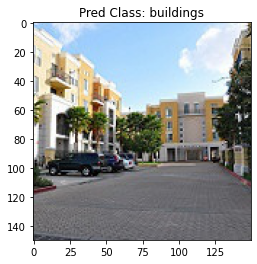

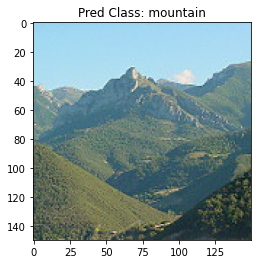

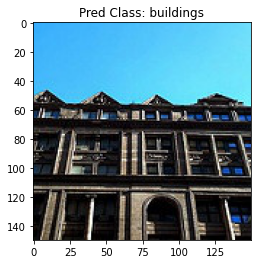

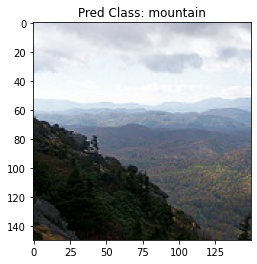

In [20]:
pred_images = os.listdir(pred_dir)

for img in pred_images[:5]:
    image_file = os.path.join(pred_dir,img)
    image = mpimg.imread(image_file)  # Read the image file
    pred_class = class_names[tf.argmax(model_1.predict(tf.expand_dims(image,axis=0))[0]).numpy()]
#     predictions.append(pred_class)
    plt.figure()
    plt.imshow(image)
    plt.title(f"Pred Class: {pred_class}")

In [21]:
pwd

'/kaggle/working'

In [22]:
model_1.save('Kaggle_Intel_Image_Classification_CNN')

2022-01-12 15:48:31.344727: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [23]:
model_TL.save('Kaggle_Intel_Image_Classification_Transfer_Learning_EfficientNetB0')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
